In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
output_var = 'charges'

#### Data Exploration
In this section we vizualise the data using univariate and bi-variate plots and simple descriptive statistics. We first split the data into a training and test data set and only vizualise the training set to simulate the fact that we do not want to draw any conclusions based on the test data that is only to be used to measure the expected accuracy of the model on previously unseen (out of sample) data.

In [6]:
import numpy as np
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[[output_var]]

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.25)

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [7]:
concat_train_data = pd.concat([x_train,y_train],axis=1)

In [8]:
concat_train_data.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.437687,30.630189,1.101695,13524.816768
std,14.171492,6.230134,1.224185,12416.940908
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.050000,0.000000,4759.829400
50%,40.000000,30.210000,1.000000,9391.346000
75%,51.000000,34.800000,2.000000,17062.210700
max,64.000000,53.130000,5.000000,63770.428010


###### Note:
<li>A baseline model is when we predict charges for all customers as the average (mean) charges in the training data. The Root Mean Square Error is the standard deviation which we can see above is \$12,416.94
<li> Charges has a skewed distribution, the mean is much larger than the meadian value, suggesting that they are people with large values of charges that is affecting the mean value.

In [9]:
concat_train_data.corr()[output_var].sort_values()

children    0.064900
bmi         0.224817
age         0.302320
charges     1.000000
Name: charges, dtype: float64

In [10]:
concat_train_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [144]:
concat_train_data.query('region=="northwest"').describe()

,age,bmi,children,charges
count,240.000000,240.000000,240.000000,240.000000
mean,39.220833,29.259604,1.183333,12881.882492
std,14.041972,5.281592,1.182037,11672.758792
min,19.000000,17.385000,0.000000,1621.340200
25%,26.000000,25.816250,0.000000,4606.413187
50%,39.000000,28.832500,1.000000,8883.099750
75%,51.000000,32.775000,2.000000,16452.097987
max,64.000000,42.940000,5.000000,60021.398970


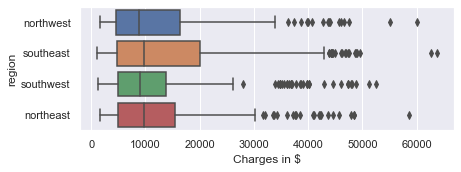

In [136]:
import seaborn as sns
sns.boxplot(y='region',x=output_var,data=concat_train_data,orient='h')
plt.xlabel("Charges in $")
plt.show()

Question: If the whiskers on the box plot are supposed to be of length 1.5\*IQR, why do they appear to be of different length? 

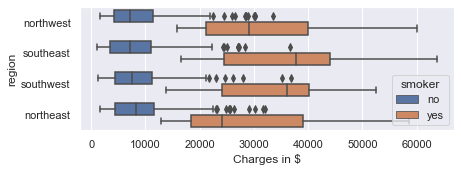

In [139]:
sns.boxplot(y='region',x='charges',data=concat_train_data,hue='smoker',orient='h')
plt.xlabel("Charges in $")
plt.show()

###### Note: 
We can see from the box plots above that smoking results in a significant increase in insurance charges. In addition to being higher, it also seems like there is a larger variance in Charges for smokers. Hence outliers only appear in non-smoker where the variance seems much smaller. Also not that smokers are paying a lot more in southeast and southwest compared with the north. However, for non smokers, the northeast appear most expensive.

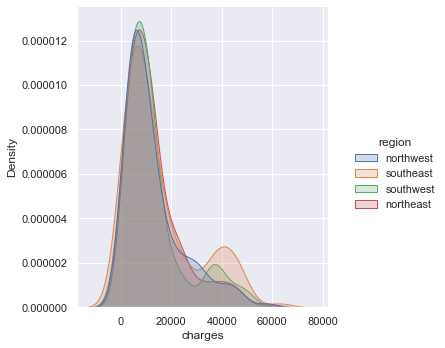

In [138]:
sns.displot(concat_train_data, x=output_var, hue="region", kind="kde", fill=True)

###### Note:
All distributions around region are similar, bi-model distributions. We can hypothesise that the two modes are associated with smokers and non-smokers. The increase in charges seems most pronounced for the south east and south west, which can be inferred from the box plots above too.

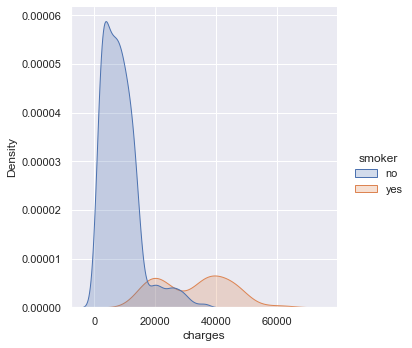

In [145]:
sns.displot(concat_train_data, x=output_var, hue="smoker", kind="kde", fill=True)

In [150]:
from scipy.stats import ttest_ind
cat1 = concat_train_data.query("smoker=='yes'")
cat2 = concat_train_data.query("smoker=='no'")

ttest_ind(cat1['charges'], cat2['charges'])

Ttest_indResult(statistic=40.467990095450745, pvalue=6.605777632369158e-213)

In [151]:
cat1 = concat_train_data.query("region=='northeast'")
cat2 = concat_train_data.query("region=='northwest'")

ttest_ind(cat1['charges'], cat2['charges'])

Ttest_indResult(statistic=0.06309282994940242, pvalue=0.9497186850232642)

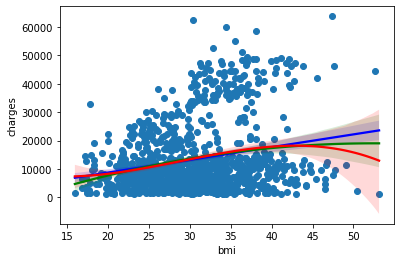

In [13]:
i_attribute = 'bmi'
plt.scatter(x=concat_train_data[i_attribute],y=concat_train_data['charges'])
sns.regplot(x=i_attribute,y='charges', data=concat_train_data,  scatter=None, color='b', order=1)
sns.regplot(x=i_attribute,y='charges', data=concat_train_data,  scatter=None, color='g', order=2)
sns.regplot(x=i_attribute,y='charges', data=concat_train_data,  scatter=None, color='r', order=3)
plt.show()

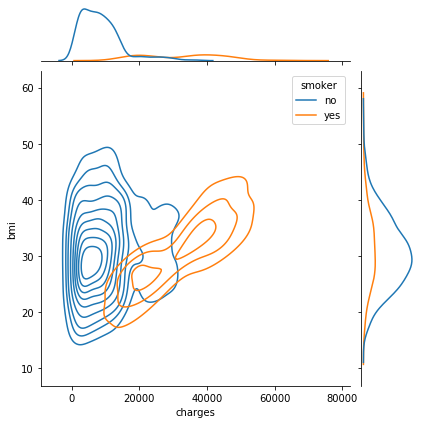

In [15]:
sns.jointplot(x="charges",y="bmi",hue='smoker',data=concat_train_data,kind='kde')
plt.xlabel("Charges in $")
plt.ylabel("bmi")
plt.show()

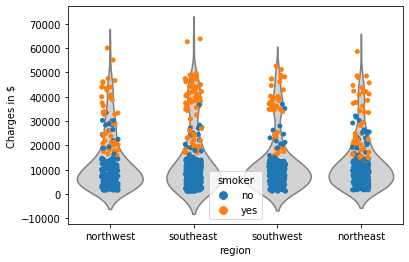

In [16]:
sns.violinplot(x='region',y='charges',data=concat_train_data,inner=None,color='lightgray')
sns.stripplot(x='region',y='charges',data=concat_train_data,size=5,hue='smoker',jitter=True)
plt.ylabel("Charges in $")
plt.show()

In [17]:
from scipy.stats import chi2_contingency
cross_data = pd.crosstab(concat_train_data.region, concat_train_data.smoker)
stat, p, dof, expected = chi2_contingency(cross_data) 
print(cross_data)
print(stat,p)

smoker      no  yes
region             
northeast  197   48
northwest  195   45
southeast  204   71
southwest  200   43
6.476103468620635 0.09060970308933447


In [18]:
encoded_data = pd.get_dummies(concat_train_data, columns=["sex","smoker","region"],drop_first=True)

In [19]:
encoded_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
769,38,19.475,2,6933.24225,0,0,1,0,0
803,18,42.240,0,38792.68560,0,1,0,1,0
1062,59,41.140,1,48970.24760,1,1,0,1,0
973,19,40.500,0,1759.33800,0,0,0,0,1
452,24,23.400,0,1969.61400,1,0,0,0,1


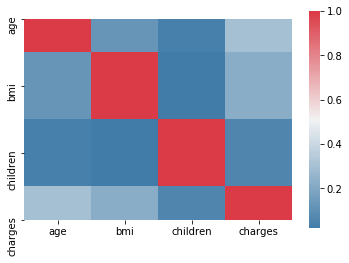

In [20]:
corr = concat_train_data.corr()
import seaborn as sns
import numpy as np
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

In [21]:
corr

,age,bmi,children,charges
age,1.000000,0.126539,0.035514,0.302320
bmi,0.126539,1.000000,0.019980,0.224817
children,0.035514,0.019980,1.000000,0.064900
charges,0.302320,0.224817,0.064900,1.000000


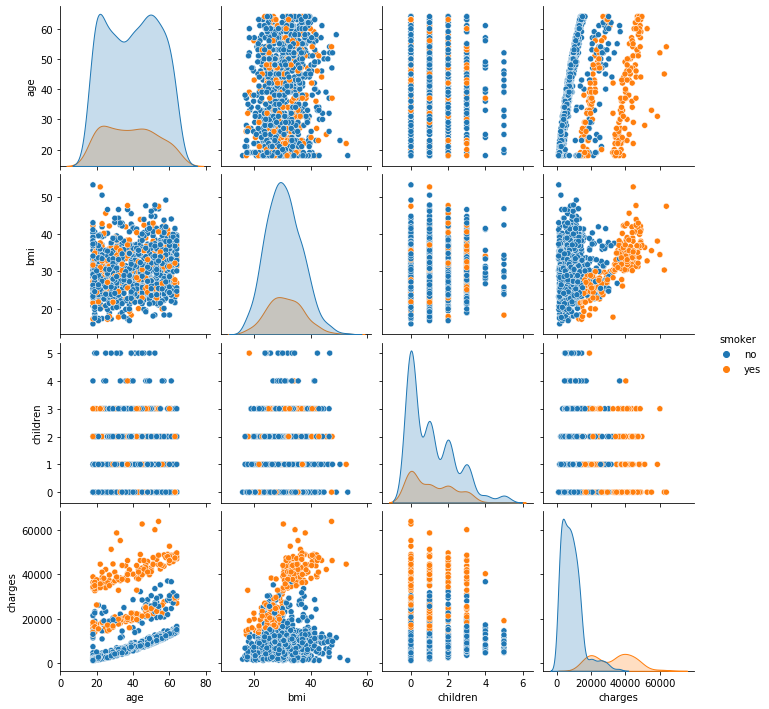

In [22]:
sns.pairplot(concat_train_data, hue="smoker", height=2.5)

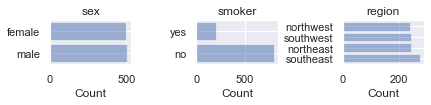

In [23]:
sns.set(rc={'figure.figsize':(6.7,2.27)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
attr = ['sex','smoker','region']
for i in range(0,3):
    ax = fig.add_subplot(2, 3, i+1)
    counts = concat_train_data[attr[i]].value_counts()
    myproblems = list(counts.index)
    my_problem_counts = list(counts)
    y_pos = np.arange(len(myproblems))
    plt.barh(y_pos, my_problem_counts, align='center', alpha=0.5)
    plt.yticks(y_pos, myproblems)
    plt.xlabel('Count')
    plt.title(attr[i])

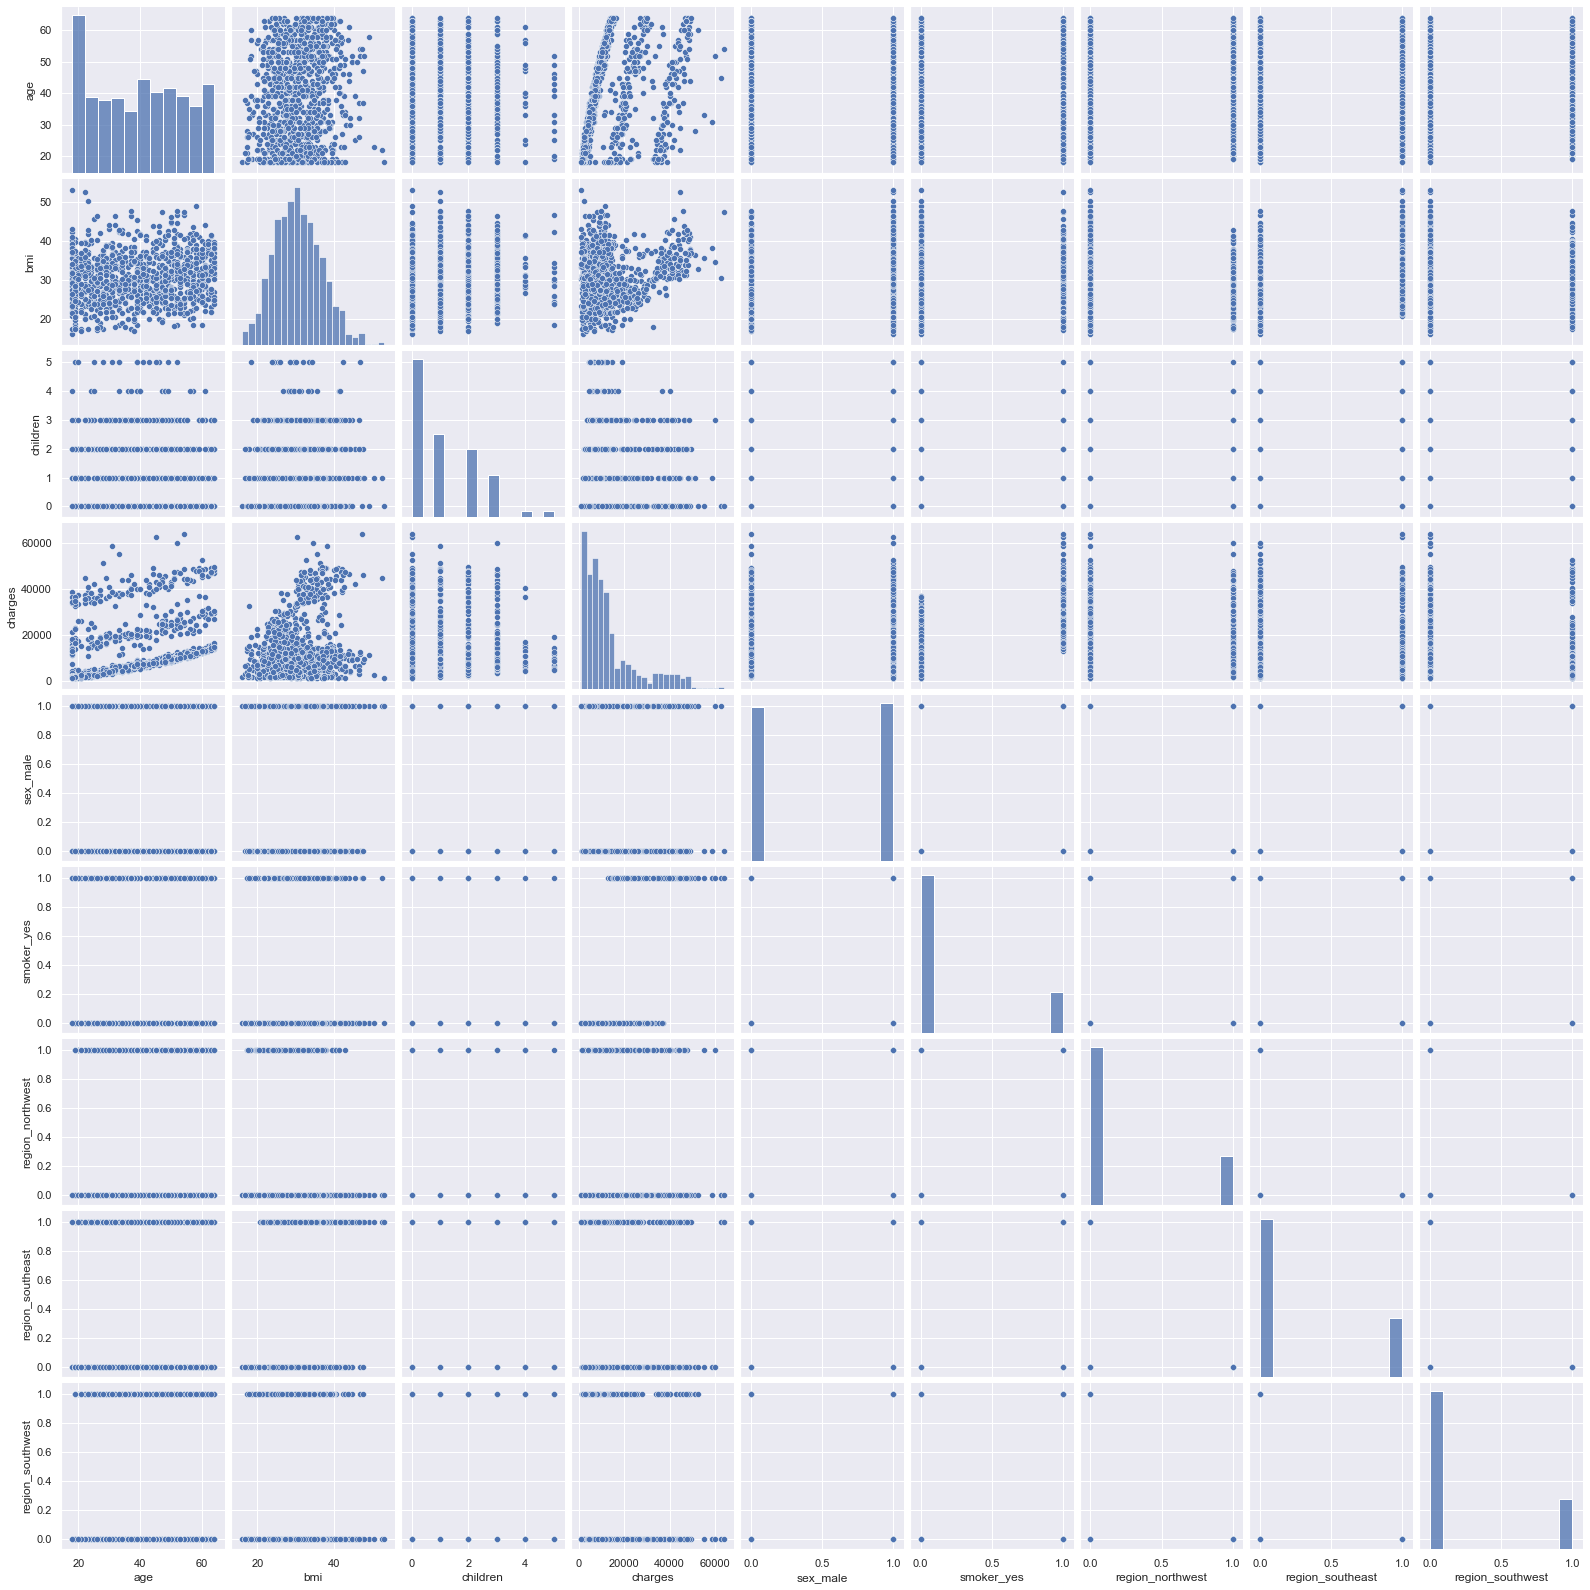

In [24]:
sns.pairplot(encoded_data, height=2.5)

In [25]:
encoded_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
769,38,19.475,2,6933.24225,0,0,1,0,0
803,18,42.240,0,38792.68560,0,1,0,1,0
1062,59,41.140,1,48970.24760,1,1,0,1,0
973,19,40.500,0,1759.33800,0,0,0,0,1
452,24,23.400,0,1969.61400,1,0,0,0,1


In [26]:
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]].to_numpy()
y = encoded_data[[output_var]].to_numpy()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     388.2
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          1.31e-299
Time:                        09:42:57   Log-Likelihood:                -10167.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     994   BIC:                         2.040e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.235e+04   1122.804    -11.001      0.0

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]])
Y = encoded_data[[output_var]]

In [28]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     388.2
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          1.31e-299
Time:                        09:42:57   Log-Likelihood:                -10167.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     994   BIC:                         2.040e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2143.0093    667.574     -3.210      0.0

In [30]:
inputs = list(encoded_data.columns)
inputs.remove(output_var)
print(inputs)

['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [159]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
X_test = pd.DataFrame(X_test,columns = inputs)
y_pred = est2.predict(sm.add_constant(X_test))
preds = y_pred.to_numpy().reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

ValueError: shapes (335,9) and (5,) not aligned: 9 (dim 1) != 5 (dim 0)

In [60]:
X2 = sm.add_constant(X[:,np.delete(np.arange(X.shape[1]),[3,5,6,7])])
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     775.0
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          2.89e-304
Time:                        10:22:48   Log-Likelihood:                -10169.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     998   BIC:                         2.037e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2444.3808    579.640     -4.217      0.0

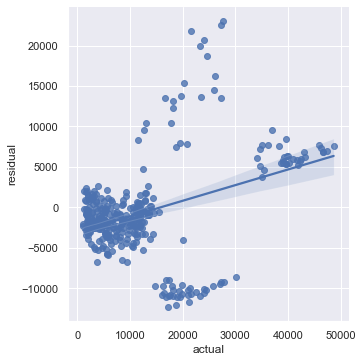

Root Mean Square Error:  5879.891035056813


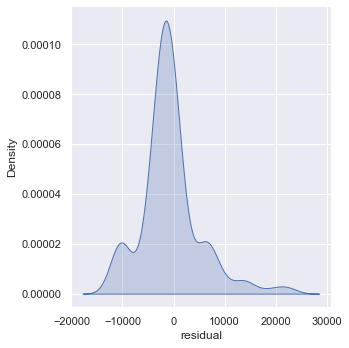

In [61]:
y_pred = est2.predict(sm.add_constant(X_test[[y for x,y in enumerate(inputs) if x not in [3,5,6,7]]]))
preds = y_pred.to_numpy().reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [160]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(excluded[best_feature])
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(excluded[best_feature], best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        print(worst_pval)
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(X[included].columns[worst_feature], worst_pval))
            included.remove(X[included].columns[worst_feature])
        if not changed:
            break
    return included

inputs=list(encoded_data.columns)
inputs.remove(output_var)
X = pd.DataFrame(X,columns = inputs)
y = encoded_data[[output_var]].to_numpy()
result = stepwise_selection(X, y)
print('resulting features:')
print(result)
X2 = sm.add_constant(X[result])
est = sm.OLS(y, X2).fit()
print(est.summary())

C:\Users\sarab\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  smoker_yes                     with p-value 6.60578e-213
6.60577763236803e-213
Add  age                            with p-value 2.59967e-75
2.5996718305147316e-75
Add  bmi                            with p-value 8.99878e-23
8.998781328581243e-23
Add  children                       with p-value 0.0023445
0.0023445017865417117
0.0023445017865417117
resulting features:
['smoker_yes', 'age', 'bmi', 'children']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     775.0
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          2.89e-304
Time:                        17:17:26   Log-Likelihood:                -10169.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                   

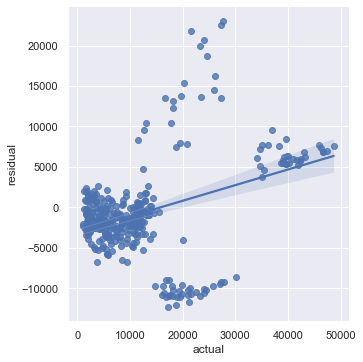

Root Mean Square Error:  5879.891035056813


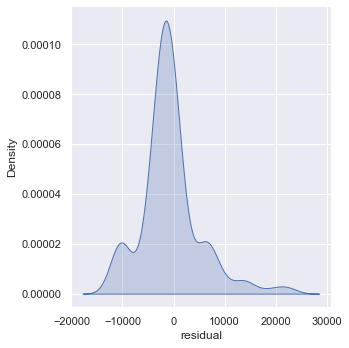

In [162]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
X_test = pd.DataFrame(X_test,columns = inputs)
y_pred = est.predict(sm.add_constant(X_test[result]))
preds = y_pred.to_numpy().reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [157]:
residual_df

,actual,predicted,residual
0,9264.79700,9705.401800,-440.604800
1,12096.65120,14779.861782,-2683.210582
2,2643.26850,2660.884730,-17.616230
3,11657.71890,14100.617612,-2442.898712
4,34672.14720,31818.196400,2853.950800
...,...,...,...
330,4347.02335,4029.829180,317.194170
331,10806.83900,15718.796806,-4911.957806
332,1137.46970,1267.679040,-130.209340
333,9872.70100,9200.040000,672.661000


#### Piecewise linear Regression

In [65]:
list_match = X['smoker_yes'] == 0
no_smoke_X = X.loc[list_match]
no_smoke_X.drop('smoker_yes',axis=1,inplace=True)
y = pd.DataFrame(y,columns=[[output_var]])
no_smoke_y = y.loc[list_match].to_numpy()

result = stepwise_selection(no_smoke_X, no_smoke_y)
print('resulting features:')
print(result)
X2 = sm.add_constant(no_smoke_X[result])
est_yes = sm.OLS(no_smoke_y, X2).fit()
print(est_yes.summary())

C:\Users\sarab\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\sarab\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  age                            with p-value 4.1959e-97
4.1959001949149496e-97
Add  children                       with p-value 0.000122604
0.00012260359132179236
0.00012260359132179236
resulting features:
['age', 'children']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     304.4
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           7.93e-99
Time:                        10:29:04   Log-Likelihood:                -7848.1
No. Observations:                 796   AIC:                         1.570e+04
Df Residuals:                     793   BIC:                         1.572e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                      

In [218]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
print(X_test.shape)
no_smoke_X = pd.DataFrame(X_test,columns = inputs).query("smoker_yes == 0")
print(no_smoke_X.shape)
# no_smoke_X = X_test.loc[list_match]
X2 = sm.add_constant(no_smoke_X[result])
y_pred = est.predict(X2)

(335, 8)
(268, 8)


In [234]:
select_y = y_test.iloc[no_smoke_X.index]
print(y_pred.to_numpy().shape,select_y.shape)
preds = y_pred.to_numpy().reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([select_y,preds,select_y-preds],axis = 1),columns=['actual','predicted','residual'])

(268,) (268, 1)


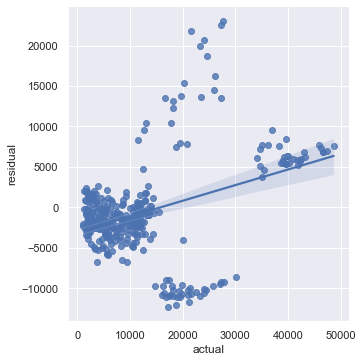

Root Mean Square Error:  5879.891035056813


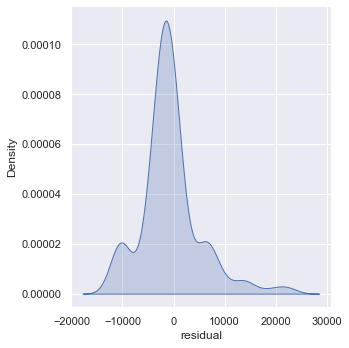

In [66]:
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [67]:
list_match = X['smoker_yes'] == 1
yes_smoke_X = X.loc[list_match]
yes_smoke_X.drop('smoker_yes',axis=1,inplace=True)
y = pd.DataFrame(y,columns=[[output_var]])
yes_smoke_y = y.loc[list_match].to_numpy()

result = stepwise_selection(yes_smoke_X, yes_smoke_y)
print('resulting features:')
print(result)
X2 = sm.add_constant(yes_smoke_X[result])
est = sm.OLS(yes_smoke_y, X2).fit()
print(est.summary())

Add  bmi                            with p-value 3.09133e-47
3.0913349378709187e-47
Add  age                            with p-value 3.94127e-16
3.9412745877291106e-16
3.9412745877291106e-16
resulting features:
['bmi', 'age']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     289.3
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           2.79e-60
Time:                        10:31:26   Log-Likelihood:                -2094.0
No. Observations:                 207   AIC:                             4194.
Df Residuals:                     204   BIC:                             4204.
Df Model:                           2                                         
Covariance Type:            nonrobust                          

C:\Users\sarab\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\sarab\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [68]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
print(X_test.shape)
yes_smoke_X = pd.DataFrame(X_test,columns = inputs).query("smoker_yes == 1")
print(yes_smoke_X.shape)
# no_smoke_X = X_test.loc[list_match]
X2 = sm.add_constant(yes_smoke_X[result])
y_pred = est.predict(X2)

select_y = y_test.iloc[yes_smoke_X.index]
print(y_pred.to_numpy().shape,select_y.shape)
preds = y_pred.to_numpy().reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([select_y,preds,select_y-preds],axis = 1),columns=['actual','predicted','residual'])

(335, 8)
(67, 8)
(67,) (67, 1)


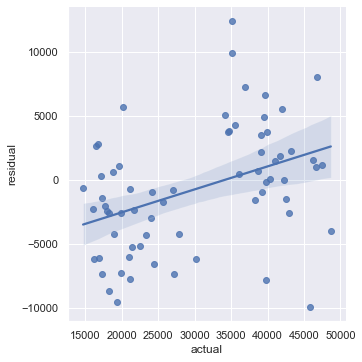

Root Mean Square Error:  4841.269945042583


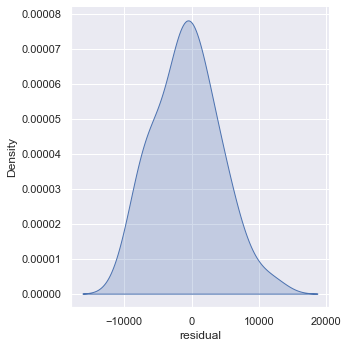

In [69]:
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

#### Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0,max_depth=5)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(max_depth=5, random_state=0)

In [102]:
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =inputs) 

In [103]:
import os
os.system("cmd C:/Users/sarab/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz/dot -Tpng 'C:/Users/sarab/Documents/Python Scripts/sabudh/tree.dot' -o 'C:/Users/sarab/Documents/Python Scripts/sabudh/tree.png")

0

In [104]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
y_pred = regressor.predict(X_test) 
  
# print the predicted price 
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])

(335, 1) (335, 1)


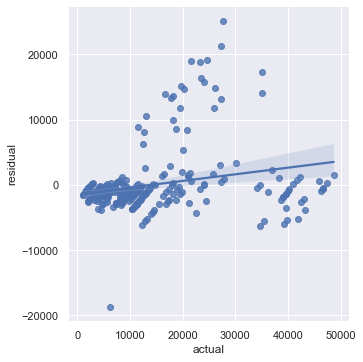

Root Mean Square Error:  4531.574190234936


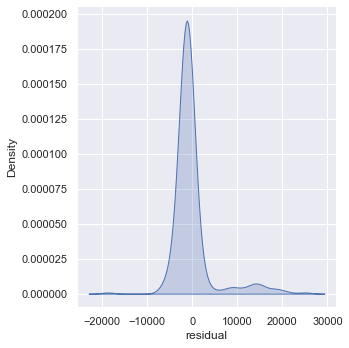

In [105]:
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

#### Nearest Neighbour Regression

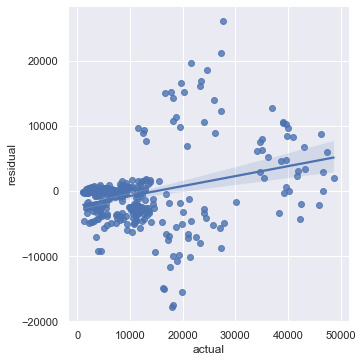

Root Mean Square Error:  5503.148795160211


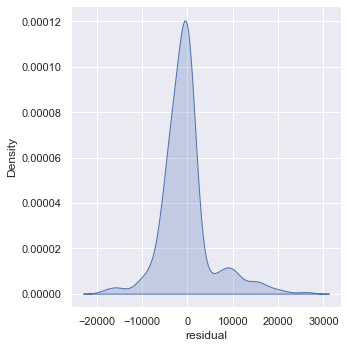

In [156]:
X = encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]].to_numpy()
y = encoded_data[[output_var]].to_numpy()
X = scaler.fit_transform(encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]])

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)


X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
y_pred = neigh.predict(X_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

#### Ensemble Model

In [132]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X, y)
regr.feature_importances_

C:\Users\sarab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.22736265e-01, 1.70524554e-01, 1.01482118e-02, 6.71954427e-04,
       6.93384955e-01, 1.30525368e-03, 6.68425852e-04, 5.60380374e-04])

In [135]:
regr.estimators_[0]

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=209652396)

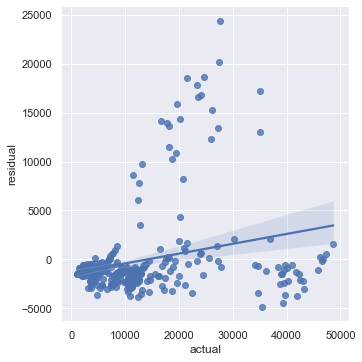

Root Mean Square Error:  4320.167713554186


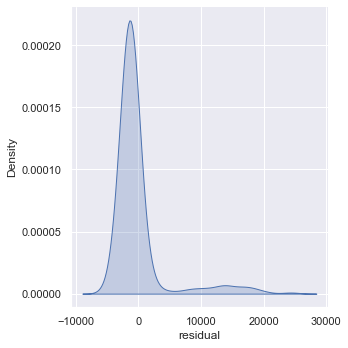

In [109]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
y_pred = regr.predict(X_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0,min_samples_split=4)
reg.fit(X, y)

C:\Users\sarab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(min_samples_split=4, random_state=0)

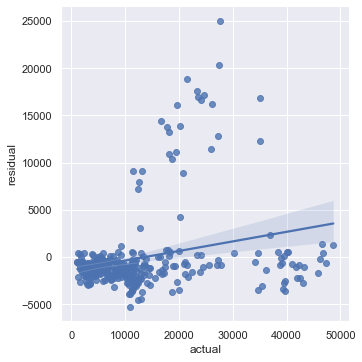

Root Mean Square Error:  4295.949603663442


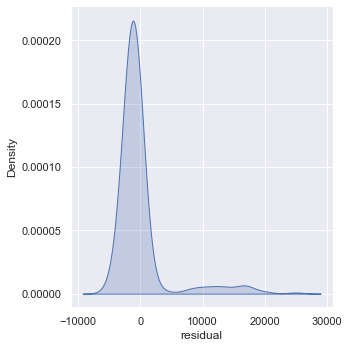

In [129]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
y_pred = reg.predict(X_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [122]:
reg.feature_importances_

array([0.12261068, 0.1778843 , 0.01027593, 0.00092894, 0.68478905,
       0.00131731, 0.00132445, 0.00086934])

In [130]:
reg.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      min_samples_split=4,
                      random_state=<mtrand.RandomState object at 0x0000020F1913E948>)

In [131]:
export_graphviz(reg.estimators_[0][0], out_file ='tree.dot', 
               feature_names =inputs) 

#### Support Vector Regression

In [223]:
from sklearn.svm import SVR
regr = SVR(C=10000.0, epsilon=0.001,kernel='poly',degree=3)
regr.fit(X, y)

C:\Users\sarab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=10000.0, epsilon=0.001, kernel='poly')

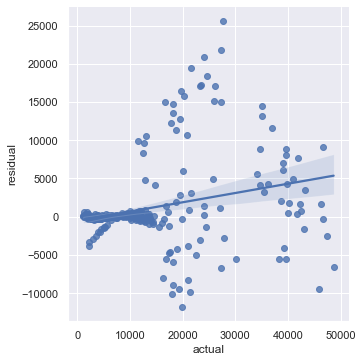

Root Mean Square Error:  4927.225042780123


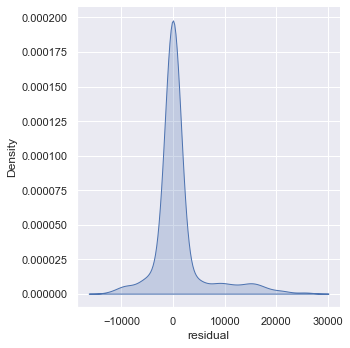

In [224]:
X_test = scaler.transform(pd.get_dummies(x_test, columns=["sex","smoker","region"],drop_first=True))
y_pred = regr.predict(X_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)